<a href="https://colab.research.google.com/github/CoderAPS/neural_nets/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D
from keras import metrics
from keras.datasets import fashion_mnist

import numpy as numpy
import matplotlib.pyplot as plt

print('Tensorflow version: ', tf.__version__)
print('Keras version: ', keras.__version__)


Tensorflow version:  2.9.2
Keras version:  2.9.0


In [28]:
# Load data
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


In [29]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



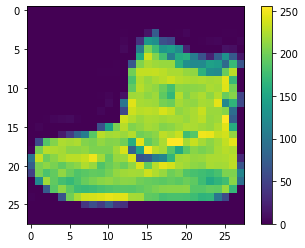

In [31]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show();

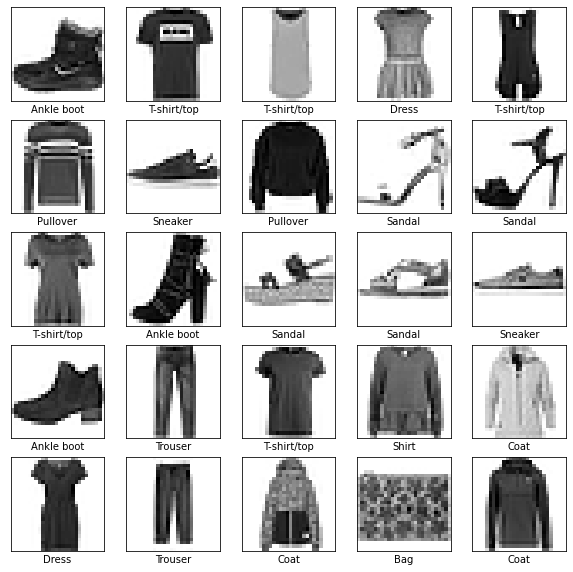

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [33]:
# Normalize pixel values between 0 and 1
x_train, x_test = x_train/255, x_test/255

In [34]:
# Convert y labels to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [35]:
y_train.shape

(60000, 10)

In [57]:

def create_model(layer_size):

  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))

  model.add(Dense(units=layer_size[0],activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=layer_size[0],activation='relu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(units=10,activation='softmax'))
  

  # see this https://hackernoon.com/multiclass-classification-with-keras
  # 
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['Accuracy','Recall','Precision'])
  
  
  return model 

def evaluate(model,epochs=50,batch_size=800):

  model.summary()

  history = model.fit(x_train,y_train,epochs=epochs,
                      batch_size=batch_size,validation_split=0.1,verbose=False)


  fig,ax = plt.subplots(1,2,figsize=(12,6))
  ax[0].plot(history.history['Accuracy'])
  ax[0].plot(history.history['val_Accuracy'])
  ax[0].set_title('Accuracy')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Accuracy')
  ax[0].legend(['Training','Validation'],loc='best')

  ax[1].plot(history.history['loss'])
  ax[1].plot(history.history['val_loss'])
  ax[1].set_title('Loss')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Loss')
  ax[1].legend(['Training','Validation'],loc='best')

  
  print(history.history.keys())  
  test_loss,test_accuracy,test_recall,test_precision = model.evaluate(x_test,y_test,verbose=True)
  acc = 'Accuracy'
  loss = 'loss'
  val = 'val_'
  
  print(f'\nTraining Accuracy: {history.history[acc][-1]:.3}\tTraining Loss: {history.history[loss][-1]:.3}')
  print(f'\nValidation Accuracy: {history.history[val+acc][-1]:.3}\tValidation Loss: {history.history[val+loss][-1]:.3}')
  print(f'\nTest Accuracy: {test_accuracy:.3}\tTest Loss: {test_loss:.3}')
  print(f'\nTest Recall: {test_recall:.3}\nTest Precision: {test_precision:.3}')




In [ ]:
'''  
  
  '''

(60000, 28, 28)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-tr

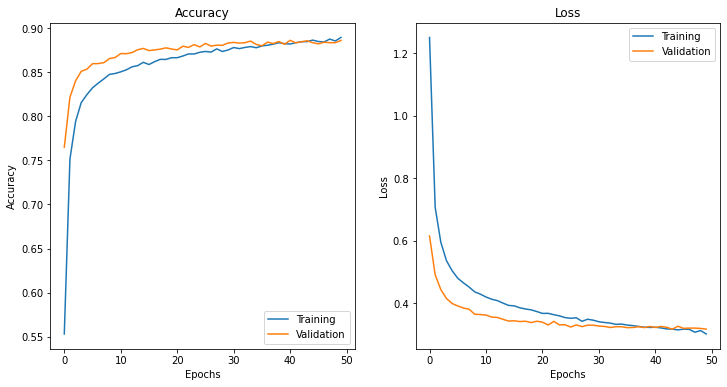

In [58]:
model = create_model([128])
evaluate(model)

In [ ]:
x_train[0].shape


(28, 28)

In [75]:

def create_conv_model():
  model = Sequential()
  model.add(Conv2D(64,3,activation='relu',input_shape=(28,28,1)))
  model.add(MaxPool2D(2))
  model.add(Conv2D(64,3,activation='relu')) 

  model.add(Dropout(0.7))
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.6))
  
  model.add(Dense(10,activation='softmax'))

  model.compile(optimizer='adam',loss='categorical_crossentropy',
                metrics=['Accuracy','Recall','Precision'])
  return model

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 dropout_32 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 flatten_16 (Flatten)        (None, 7744)              0         
                                                                 
 dense_36 (Dense)            (None, 128)               991360    
                                                     

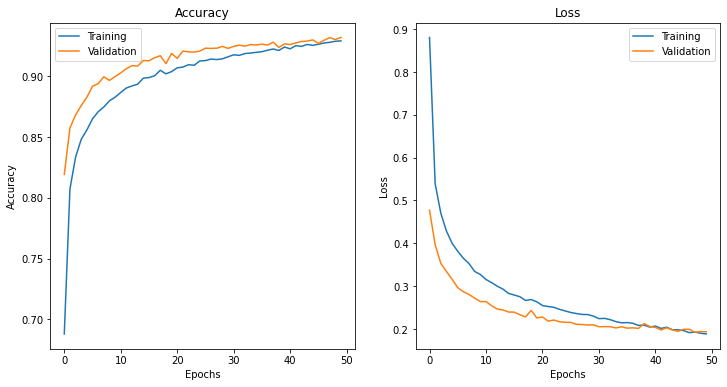

In [76]:
conv_model = create_conv_model()
evaluate(conv_model)